# E) 2D nonlinear magnetostatics

- **<font color='green'>[RUN & OBSERVE]</font>** $\rightarrow$ the cell should be run directly without modification
- **<font color='orange'>[RUN & PLAY]</font>** $\rightarrow$ the cell can be run directly, but some parameters should be changed interactively
- **<font color='red'>[FILL & RUN]</font>**    $\rightarrow$ the cell should be filled before being run
- **<font color='magenta'>[FILL & PLAY]</font>** $\rightarrow$ the cell should be filled, and then some parameters should be changed interactively.

_______
## 1) Equation

We want to solve the following weak formulation, i.e., find $a\in H^1_0 (\Omega)$ such that

$$ \forall v\in H^1_0(\Omega) , \quad \int_\Omega \nu(|\nabla a|^2) \nabla a \cdot \nabla v = \int_\Omega v j $$

with $\nu$ the magnetic reluctivity, which is
- $ \nu = \nu_0 $ in air and conductors
- $ \nu(b^2) = 100 + 10 \exp(1.8 b^2 ) $ in iron

and $j$ the current density that is
- $ j = 0 $ in air and iron
- $ j= +J $ in positive conductor
- $ j = -J$ in negative conductor
  
with $J = 10\;A/mm^2$. 

________
## 2) Geometry

We consider a closed iron core with a winding. Without airgap, there is a risk of saturation !

|**<font color='green'>[RUN & OBSERVE]</font>**|
|---|

In [1]:
from utils.myGeometries import gapedInductor
from ngsolve.webgui import Draw
mesh = gapedInductor(airgap = 0, h = 0.01) # no airgap
Draw(mesh.MaterialCF({"condN":1, "iron":2, "condP":3}), mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.25…

BaseWebGuiScene

We can get the lables of the regions...
|**<font color='green'>[RUN & OBSERVE]</font>**|
|---|

In [2]:
mesh.GetMaterials()   # region names

('air', 'iron', 'condP', 'condN')

... and boundaries.

|**<font color='green'>[RUN & OBSERVE]</font>**|
|---|

In [3]:
mesh.GetBoundaries()   # boundaries names

('out',
 'out',
 'out',
 'out',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '')

_____
## 3) Nonlinear formulation

### a) Material properties

The magnetic reluctivity in iron depends on the square of the flux density and reads
$$ \nu_{iron}(b^2) = 100 + 10 \exp(1.8 b^2 ) $$

|**<font color='red'>[FILL & RUN]</font>**|
|---|

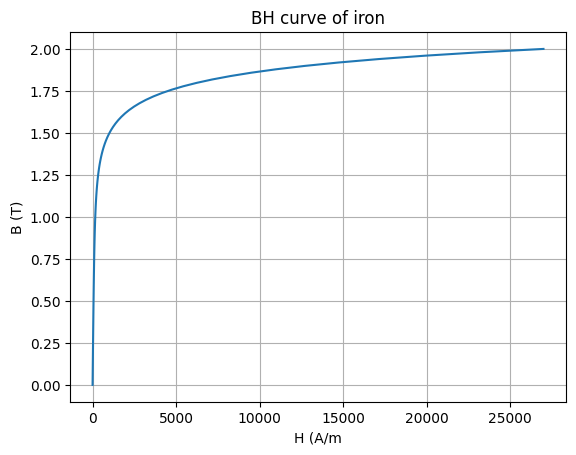

In [ ]:
from ngsolve import exp, pi

mu0 = 4e-7 * pi
J = 10e6

def nu_iron(b2):
    """ magnetic reluctivity of iron w.r.t b²"""
    return .........................

def dnu_iron_db2(b2):
    """ derivative of the magnetic reluctivity of iron w.r.t b² """
    return .........................

#-----------------------------------------------------------------------
# Plot the BH curve
import numpy as np
import matplotlib.pyplot as plt
b = np.linspace(0,2,100)
plt.plot(nu_iron(b**2) * b, b); plt.xlabel("H (A/m"); plt.ylabel("B (T)")
plt.title("BH curve of iron"); plt.grid(); plt.show()

### b) Residual

We first define the residual (symbolic expression, not a linear or bilinear form)...

|**<font color='red'>[FILL & RUN]</font>**|
|---|

In [ ]:
from ngsolve import grad, dx, CoefficientFunction
R = CoefficientFunction( ((0,1),(-1,0)), dims = (2,2))
curl = lambda u : R * grad(u)

def residual(a, 
             v  # test function
            ):  # returns symbolic expression of the residual 
    ...............................
    return ........................

and its directional derivative  (symbolic expression, not a linear or bilinear form).

|**<font color='red'>[FILL & RUN]</font>**|
|---|

In [ ]:
def d_residual(da,  # trial function
               v,   # test function
               aOld # previous a
              ):    # returns symbolic expression of the residual directional derivative w.r.t aOld + t*da
    ...............................
    return ........................

### c) Simple Newton

Now it's time to apply the Newton method. We have to chose the function space and set up the initial guess.

Then, Newton method consists on three steps:
1. Find $\delta a\in H(\Omega)$ such that $R'(a_{n}, v ; \delta a) = - R(a_{n}, v) \quad \forall v\in H(\Omega)$
2. Update $a_{n+1} = a_{n} + \alpha \delta a $
3. Stop criteria : $ |R(a_{n}, \delta a)| \leq \epsilon_1$,  $ |R(a_{n}, v_{i})| \leq \epsilon_1$, $n\geq n_{max}$,...

|**<font color='red'>[FILL & RUN]</font>**|
|---|

In [ ]:
#-----------------------------------------------------------------------
# initialization
from ngsolve import H1, GridFunction
fes = H1(mesh, order = 1, dirichlet = "out") # finite element space
da, v = fes.TnT()
sol = GridFunction(fes)
resList = []
#-----------------------------------------------------------------------
# loop
from ngsolve import LinearForm, BilinearForm
step = 0.01
tol = 1e-8
maxit = 100
for i in range(maxit):
    # compute and assemble residual and derivatives
    res = LinearForm( .....................).Assemble().vec
    dres = BilinearForm(.....................).Assemble().mat

    # compute norm of the residual
    resList.append(np.linalg.norm(res.FV().NumPy()[fes.FreeDofs()]))
    
    # compute descent direction
    d = ......................

    # update
    sol.vec.data += .............................
    print(f"{i = } | res = {resList[-1]:.5e} | {step = :.2e}")
    
    # simple step control
    if i>0 and resList[-1] < resList[-2]:
        step = min(1, 1.2*step)
    else : 
        step = step/2

    # simple stop criterion based on the norm of residual
    if resList[-1] < tol:
        break

i = 0 | res = 1.46788e+02 | step = 1.00e-02
i = 1 | res = 1.45457e+02 | step = 5.00e-03
i = 2 | res = 1.44713e+02 | step = 6.00e-03
i = 3 | res = 1.43828e+02 | step = 7.20e-03
i = 4 | res = 1.42776e+02 | step = 8.64e-03
i = 5 | res = 1.41527e+02 | step = 1.04e-02
i = 6 | res = 1.40044e+02 | step = 1.24e-02
i = 7 | res = 1.38285e+02 | step = 1.49e-02
i = 8 | res = 1.36203e+02 | step = 1.79e-02
i = 9 | res = 1.33744e+02 | step = 2.15e-02
i = 10 | res = 1.30849e+02 | step = 2.58e-02
i = 11 | res = 1.27451e+02 | step = 3.10e-02
i = 12 | res = 1.23481e+02 | step = 3.72e-02
i = 13 | res = 1.18867e+02 | step = 4.46e-02
i = 14 | res = 1.13540e+02 | step = 5.35e-02
i = 15 | res = 1.07436e+02 | step = 6.42e-02
i = 16 | res = 1.00507e+02 | step = 7.70e-02
i = 17 | res = 9.27311e+01 | step = 9.24e-02
i = 18 | res = 8.41254e+01 | step = 1.11e-01
i = 19 | res = 7.47607e+01 | step = 1.33e-01
i = 20 | res = 6.47785e+01 | step = 1.60e-01
i = 21 | res = 5.44043e+01 | step = 1.92e-01
i = 22 | res = 4.395

Is it converging? 
- If not how to make it converge?
- If yes, at what rate?
  
|**<font color='green'>[RUN & OBSERVE]</font>**|
|---|

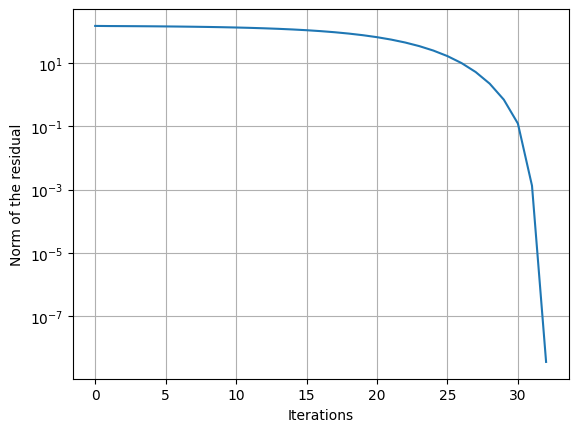

In [8]:
plt.semilogy(resList)
plt.grid()
plt.xlabel("Iterations"); plt.ylabel("Norm of the residual");
plt.show()

### d) Post-processing : flux density
We can compute the flux density $B = \text{curl}~a$.
|**<font color='red'>[FILL & RUN]</font>**|
|---|

In [ ]:
B = .................
Draw(B, mesh, 
     vectors={"grid_size" : 50, "offset" : 0.5 },
     settings = { "Objects" : { "Wireframe" : False, "Surface" : False }})

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'Objects': {'Wireframe': Fals…

BaseWebGuiScene

_________
## 4) More elaborated Newton
We can improve by : 
- considering more stopping criteria
- adding proper linesearch
- using NGSolve automatic differentiation capabilities

You can analyze the algorithm in the file `utils\mySolver`, and make some comments.

|**<font color='green'>[RUN & OBSERVE]</font>**|
|---|

In [10]:
from utils.mySolvers import solveNL

result = solveNL(fes, residual, verbosity = 3)

-------------------- START NEWTON ---------------------
Initializing  ..... done (7.01 ms).
Initial residual : 1.46788e+02
Start loop  ....... 
 It 1 -------------------------------------------------
 - Assembly ....... done (7.92 ms).
 - Solve .......... done (12.94 ms).
 - Line search .... 
   it 0 : ||residual|| = nan | step = 1.00e+00
   it 1 : ||residual|| = nan | step = 5.00e-01
   it 2 : ||residual|| = nan | step = 2.50e-01
   it 3 : ||residual|| = nan | step = 1.25e-01
   it 4 : ||residual|| = 2.16767e+95 | step = 6.25e-02
   it 5 : ||residual|| = 5.67251e+22 | step = 3.12e-02
   it 6 : ||residual|| = 3.48396e+04 | step = 1.56e-02
   it 7 : ||residual|| = 1.45623e+02 | step = 7.81e-03
 - Line search done (33.13 ms).
 - Conv : ||residual|| = 1.45623e+02 | decr = 1.48152e+01
 - Newton iteration done (62.72 ms).
 It 2 -------------------------------------------------
 - Assembly ....... done (15.24 ms).
 - Solve .......... done (18.40 ms).
 - Line search .... 
   it 0 : ||residual

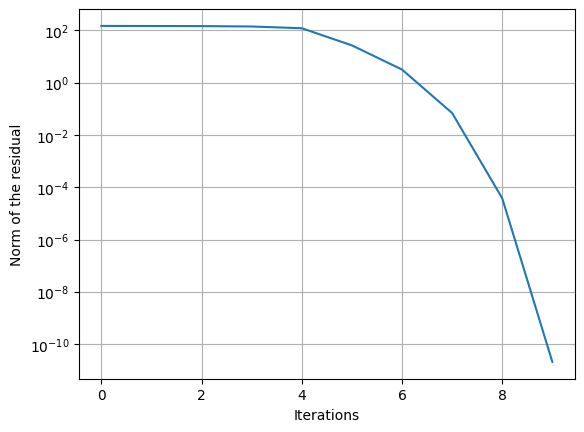

In [11]:
plt.semilogy(result["residual"])
plt.grid()
plt.xlabel("Iterations"); plt.ylabel("Norm of the residual");
plt.show()

In [12]:
Draw(curl(result["solution"]), mesh, 
     vectors={"grid_size" : 50, "offset" : 0.5 },
     settings = { "Objects" : { "Wireframe" : False, "Surface" : False }})

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'Objects': {'Wireframe': Fals…

BaseWebGuiScene